## Partie 1 - Nettoyage des données

In [18]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

#On assigne à notre variable df_election notre dataset des votes du second tour 2022. 
#Source : https://www.data.gouv.fr/fr/datasets/election-presidentielle-des-10-et-24-avril-2022-resultats-definitifs-du-2nd-tour/
df_election = pd.read_excel('datasetelection.xlsx')

#On assigne à notre variable df_revenue notre dataset des revenus médians par commune. 
#Source : https://www.data.gouv.fr/fr/datasets/revenus-et-pauvrete-des-menages-aux-niveaux-national-et-local-revenus-localises-sociaux-et-fiscaux/
df_revenue = pd.read_excel('salairecommune.xlsx')

#On assigne à notre variable df_geographie notre dataset des informations géographiques de nos communes, comme la latitude ou longitude. 
#Source : https://www.data.gouv.fr/fr/datasets/villes-de-france/
df_geographie = pd.read_csv('datageo.csv')

#On assigne à notre variable df_sociale notre dataset, contenant un indice IPS par école. Cet indice correspond à l'Indice de Position Sociale,
#calculer en fonction des attributs socio-économiques des parents.
#Plus l'IPS est grand, plus les élèves des écoles sont en moyenne d'origine sociale favorisée.
#Source : https://www.data.gouv.fr/fr/datasets/indices-de-position-sociale-dans-les-ecoles-a-partir-de-2022/
df_sociale = pd.read_csv('indicesocialecole.csv',delimiter=';')

In [19]:
#On renomme nos colonnes et modfie des champs pour faciliter les jointures par la suite
df_revenue = df_revenue.rename(columns={'LIBCOM': 'Nom de la commune'})
df_revenue = df_revenue.rename(columns={'COM': 'insee_code'})
df_revenue['Nom de la commune'] = df_revenue['Nom de la commune'].str.upper()

df_sociale = df_sociale.rename(columns={'code_insee_de_la_commune': 'insee_code'})

df_election = df_election.rename(columns={'Libellé de la commune': 'Nom de la commune'})
df_election = df_election.rename(columns={'Voix': 'VoixMacron'})
df_election = df_election.rename(columns={'Unnamed: 30': 'VoixLepen'})
df_election = df_election.rename(columns={'Unnamed: 32': '% Voix/Exp Lepen'})
df_election = df_election.rename(columns={'% Voix/Exp': '% Voix/Exp Macron'})
df_election['Nom de la commune'] = df_election['Nom de la commune'].str.upper()

In [20]:
#On créé une nouvelle colonne dans notre dataframe df_election, 'résultat', un booléen. 1 si la commune a voté majoritairement Marine Lepen,
# 0 pour Emmanuel Macron
resultat = np.array([])

for index, row in df_election.iterrows():
    if row.iloc[25] > row.iloc[32]:
        resultat = np.append(resultat, 0)
    else:
        resultat = np.append(resultat, 1)


resultat = resultat.reshape(-1, 1)
df_election['resultat'] = resultat

In [21]:
# Liste des départements à supprimer
valeurs_a_supprimer = ['ZA', 'ZB', 'ZC', 'ZD', 'ZM', 'ZN', 'ZP', 'ZS', 'ZW', 'ZX', 'ZZ']

# On supprime les données des départements hors France métropolitaine
df_election = df_election.loc[~df_election['Code du département'].isin(valeurs_a_supprimer)]

df_election

,Code du département,Libellé du département,Code de la commune,Nom de la commune,Etat saisie,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,...,% Voix/Ins,% Voix/Exp Macron,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,VoixLepen,Unnamed: 31,% Voix/Exp Lepen,resultat
0,01,Ain,1,L'ABERGEMENT-CLÉMENCIAT,Complet,643,146,22.71,497,77.29,...,36.86,52.67,2,F,LE PEN,Marine,213,33.13,47.33,0.0
1,01,Ain,2,L'ABERGEMENT-DE-VAREY,Complet,213,45,21.13,168,78.87,...,44.13,66.20,2,F,LE PEN,Marine,48,22.54,33.80,0.0
2,01,Ain,4,AMBÉRIEU-EN-BUGEY,Complet,8763,2448,27.94,6315,72.06,...,35.15,54.14,2,F,LE PEN,Marine,2609,29.77,45.86,0.0
3,01,Ain,5,AMBÉRIEUX-EN-DOMBES,Complet,1282,266,20.75,1016,79.25,...,35.18,47.27,2,F,LE PEN,Marine,503,39.24,52.73,1.0
4,01,Ain,6,AMBLÉON,Complet,103,19,18.45,84,81.55,...,43.69,62.50,2,F,LE PEN,Marine,27,26.21,37.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34815,95,Val-d'Oise,676,VILLERS-EN-ARTHIES,Complet,389,70,17.99,319,82.01,...,38.30,51.74,2,F,LE PEN,Marine,139,35.73,48.26,0.0
34816,95,Val-d'Oise,678,VILLIERS-ADAM,Complet,605,108,17.85,497,82.15,...,40.99,55.86,2,F,LE PEN,Marine,196,32.40,44.14,0.0
34817,95,Val-d'Oise,680,VILLIERS-LE-BEL,Complet,12414,5099,41.07,7315,58.93,...,36.58,67.76,2,F,LE PEN,Marine,2161,17.41,32.24,0.0
34818,95,Val-d'Oise,682,VILLIERS-LE-SEC,Complet,110,26,23.64,84,76.36,...,45.45,62.50,2,F,LE PEN,Marine,30,27.27,37.50,0.0


In [26]:
#On garde les colonnes avec les données intéressantes
colonnes_a_garder = ['Code du département','Code de la commune','Nom de la commune', 'VoixMacron','% Voix/Exp Macron','% Abs/Ins','VoixLepen','% Voix/Exp Lepen','resultat']
df_election = df_election[colonnes_a_garder].copy()

#On complète notre colonne "code de la commune" par des 0 pour faciliter la création du code insee.
#Exemple : 12 -> 012, 1 -> 001
df_election['Code de la commune'] = df_election['Code de la commune'].astype(str)
df_election['Code de la commune'] = df_election['Code de la commune'].str.zfill(3)

#On créé notre code insee par la concaténation du code du département et du code de la commune.
df_election['insee_code'] = df_election.apply(lambda row: row['Code du département'] + row['Code de la commune'], axis=1)

In [27]:
df_election

,Code du département,Code de la commune,Nom de la commune,VoixMacron,% Voix/Exp Macron,% Abs/Ins,VoixLepen,% Voix/Exp Lepen,resultat,insee_code
0,01,001,L'ABERGEMENT-CLÉMENCIAT,237,52.67,22.71,213,47.33,0.0,01001
1,01,002,L'ABERGEMENT-DE-VAREY,94,66.20,21.13,48,33.80,0.0,01002
2,01,004,AMBÉRIEU-EN-BUGEY,3080,54.14,27.94,2609,45.86,0.0,01004
3,01,005,AMBÉRIEUX-EN-DOMBES,451,47.27,20.75,503,52.73,1.0,01005
4,01,006,AMBLÉON,45,62.50,18.45,27,37.50,0.0,01006
...,...,...,...,...,...,...,...,...,...,...
34815,95,676,VILLERS-EN-ARTHIES,149,51.74,17.99,139,48.26,0.0,95676
34816,95,678,VILLIERS-ADAM,248,55.86,17.85,196,44.14,0.0,95678
34817,95,680,VILLIERS-LE-BEL,4541,67.76,41.07,2161,32.24,0.0,95680
34818,95,682,VILLIERS-LE-SEC,50,62.50,23.64,30,37.50,0.0,95682


In [28]:
#On regroupe nos données pour que chaque lignes représente une commune. On regroupe les IPS des communes en faisant leur moyenne.
colonnes_a_garder = ['insee_code','ips']
df_sociale = df_sociale[colonnes_a_garder]
df_sociale = df_sociale.groupby(['insee_code']).mean().reset_index()
df_sociale

,insee_code,ips
0,10003,93.700000
1,10006,91.400000
2,1001,105.400000
3,10011,97.600000
4,10018,94.000000
...,...,...
16211,97615,88.620000
16212,97616,90.240000
16213,97617,76.860000
16214,97701,105.866667


In [29]:
#On regroupe nos données pour que chaque lignes représentent une commune. On regroupe le revenu médian (DEC_MED18) par commune ainsi que 
#la part des retraites (DEC_PPEN18) et la part de chomage (DEC_PCHO18) dans les revenus des habitants de la commune.
df_revenue = df_revenue[['Nom de la commune','insee_code','DEC_MED18','DEC_PPEN18','DEC_PCHO18']]
df_revenue = df_revenue.groupby(['Nom de la commune', 'insee_code']).agg({'DEC_MED18': 'mean', 'DEC_PPEN18': 'mean', 'DEC_PCHO18': 'mean'}).reset_index()
df_revenue

,Nom de la commune,insee_code,DEC_MED18,DEC_PPEN18,DEC_PCHO18
0,ABBEVILLE,80001,16682.857143,34.328571,3.714286
1,ACHÈRES,78005,21958.571429,18.700000,3.342857
2,AGDE,34003,17840.000000,43.066667,4.977778
3,AGEN,47001,16795.000000,29.021429,3.738462
4,AIX-EN-PROVENCE,13001,24606.226415,26.245283,3.067925
...,...,...,...,...,...
992,ÉRAGNY,95218,23510.000000,21.414286,2.985714
993,ÉTAMPES,91223,18828.888889,21.977778,3.344444
994,ÉTAPLES,62318,16623.333333,31.566667,4.566667
995,ÉVREUX,27229,16621.818182,28.963636,3.758824


In [30]:
#On regroupe les dataframes sociale et revenu sur les codes insee.
df_revenue_sociale = pd.merge(df_sociale, df_revenue, on='insee_code', how='inner')
df_revenue_sociale

,insee_code,ips,Nom de la commune,DEC_MED18,DEC_PPEN18,DEC_PCHO18
0,10081,79.820000,LA CHAPELLE-SAINT-LUC,13646.666667,35.816667,5.120000
1,10323,88.085714,ROMILLY-SUR-SEINE,15536.000000,37.860000,4.740000
2,10333,94.133333,SAINT-ANDRÉ-LES-VERGERS,20300.000000,31.960000,2.800000
3,10362,105.800000,SAINTE-SAVINE,20106.000000,31.340000,3.400000
4,10387,94.812000,TROYES,16135.384615,30.276923,4.178261
...,...,...,...,...,...,...
945,97415,88.846667,SAINT-PAUL,16595.428571,14.982857,5.954286
946,97416,84.188889,SAINT-PIERRE,13184.444444,16.744444,6.422222
947,97418,85.378571,SAINTE-MARIE,16599.000000,14.040000,5.360000
948,97420,87.590909,SAINTE-SUZANNE,13332.857143,13.771429,5.742857


In [31]:
print(df_election.shape)
print(df_revenue.shape)

(34820, 10)
(997, 5)


In [32]:
#On garde uniquement la latitude et longitude pour notre dataframe geographie puis on regroupe sur les codes insee.
colonnes_a_garder = ['insee_code','latitude','longitude']
df_geographie= df_geographie[colonnes_a_garder]
df_geographie = df_geographie.groupby(['insee_code']).mean().reset_index()
df_geographie

,insee_code,latitude,longitude
0,01001,46.153721,4.925850
1,01002,46.009606,5.428088
2,01004,45.961049,5.372275
3,01005,45.996164,4.911967
4,01006,45.749886,5.594585
...,...,...,...
35071,98829,NaN,NaN
35072,98830,NaN,NaN
35073,98831,NaN,NaN
35074,98832,NaN,NaN


In [33]:
#On regroupe notre dataframe revenu_sociale ainsi que geographie sur les codes insee.
df_revenue_geographie = pd.merge(df_geographie, df_revenue_sociale, on='insee_code', how='inner')
df_revenue_geographie

,insee_code,latitude,longitude,ips,Nom de la commune,DEC_MED18,DEC_PPEN18,DEC_PCHO18
0,10081,48.316637,4.036019,79.820000,LA CHAPELLE-SAINT-LUC,13646.666667,35.816667,5.120000
1,10323,48.518652,3.721547,88.085714,ROMILLY-SUR-SEINE,15536.000000,37.860000,4.740000
2,10333,48.277950,4.048697,94.133333,SAINT-ANDRÉ-LES-VERGERS,20300.000000,31.960000,2.800000
3,10362,48.296438,4.023496,105.800000,SAINTE-SAVINE,20106.000000,31.340000,3.400000
4,10387,48.296734,4.078437,94.812000,TROYES,16135.384615,30.276923,4.178261
...,...,...,...,...,...,...,...,...
945,97415,-21.044521,55.322331,88.846667,SAINT-PAUL,16595.428571,14.982857,5.954286
946,97416,-21.312266,55.493811,84.188889,SAINT-PIERRE,13184.444444,16.744444,6.422222
947,97418,-20.946752,55.530655,85.378571,SAINTE-MARIE,16599.000000,14.040000,5.360000
948,97420,-20.945801,55.593087,87.590909,SAINTE-SUZANNE,13332.857143,13.771429,5.742857


In [35]:
#On supprime les données hors France métropolitaine (tous codes insee commençant par 97)
masque = ~df_revenue_geographie['insee_code'].str.startswith('97')
df_revenue_geographie = df_revenue_geographie[masque]
df_revenue_geographie

,insee_code,latitude,longitude,ips,Nom de la commune,DEC_MED18,DEC_PPEN18,DEC_PCHO18
0,10081,48.316637,4.036019,79.820000,LA CHAPELLE-SAINT-LUC,13646.666667,35.816667,5.120000
1,10323,48.518652,3.721547,88.085714,ROMILLY-SUR-SEINE,15536.000000,37.860000,4.740000
2,10333,48.277950,4.048697,94.133333,SAINT-ANDRÉ-LES-VERGERS,20300.000000,31.960000,2.800000
3,10362,48.296438,4.023496,105.800000,SAINTE-SAVINE,20106.000000,31.340000,3.400000
4,10387,48.296734,4.078437,94.812000,TROYES,16135.384615,30.276923,4.178261
...,...,...,...,...,...,...,...,...
916,95585,48.990237,2.381117,84.021739,SARCELLES,13596.800000,20.180000,5.517391
917,95598,48.988370,2.300856,122.085714,SOISY-SOUS-MONTMORENCY,26305.714286,22.242857,3.014286
918,95607,49.026361,2.220662,114.525000,TAVERNY,24668.181818,22.436364,2.818182
919,95637,49.029483,2.024236,114.737500,VAURÉAL,25226.666667,16.416667,3.116667


In [36]:
#On regroupe enfin notre dataframe des elections ainsi que celui des revenus, sociales et geographiques pour obtenir un dataframe complet
df_complet = pd.merge(df_election, df_revenue_geographie, on='insee_code', how='inner')

colonnes_a_garder = ['insee_code', 'VoixMacron','% Voix/Exp Macron','% Abs/Ins','VoixLepen','% Voix/Exp Lepen','latitude','longitude','DEC_MED18','DEC_PPEN18','DEC_PCHO18','ips','resultat']
df_complet = df_complet[colonnes_a_garder]
df_complet

,insee_code,VoixMacron,% Voix/Exp Macron,% Abs/Ins,VoixLepen,% Voix/Exp Lepen,latitude,longitude,DEC_MED18,DEC_PPEN18,DEC_PCHO18,ips,resultat
0,10081,2198,59.60,34.53,1490,40.40,48.316637,4.036019,13646.666667,35.816667,5.120000,79.820000,0.0
1,10323,2345,47.27,34.28,2616,52.73,48.518652,3.721547,15536.000000,37.860000,4.740000,88.085714,1.0
2,10333,3209,60.29,29.82,2114,39.71,48.277950,4.048697,20300.000000,31.960000,2.800000,94.133333,0.0
3,10362,2882,62.18,30.33,1753,37.82,48.296438,4.023496,20106.000000,31.340000,3.400000,105.800000,0.0
4,10387,11145,59.74,33.51,7510,40.26,48.296734,4.078437,16135.384615,30.276923,4.178261,94.812000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,95585,9722,67.87,44.95,4602,32.13,48.990237,2.381117,13596.800000,20.180000,5.517391,84.021739,0.0
872,95598,5168,71.23,32.95,2087,28.77,48.988370,2.300856,26305.714286,22.242857,3.014286,122.085714,0.0
873,95607,7438,66.27,28.70,3785,33.73,49.026361,2.220662,24668.181818,22.436364,2.818182,114.525000,0.0
874,95637,5214,72.68,31.69,1960,27.32,49.029483,2.024236,25226.666667,16.416667,3.116667,114.737500,0.0


## Partie 2 - Affichage des cartes en fonction de plusieurs données

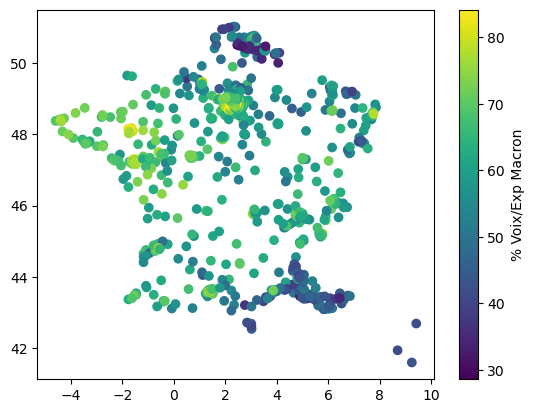

In [37]:
#On affiche la carte de la France avec, en jaune/vert, les communes ayant fortement votées Macron
plt.scatter(df_complet['longitude'], df_complet['latitude'], c=df_complet['% Voix/Exp Macron'], cmap='viridis')
plt.colorbar(label='% Voix/Exp Macron')

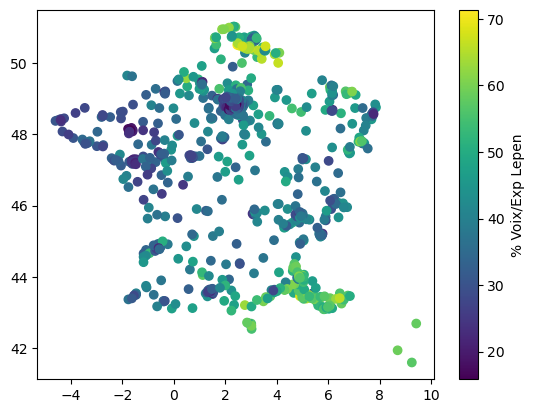

In [38]:
#On affiche la carte de la France avec, en jaune/vert, les communes ayant fortement votées Lepen
plt.scatter(df_complet['longitude'], df_complet['latitude'], c=df_complet['% Voix/Exp Lepen'], cmap='viridis')
plt.colorbar(label='% Voix/Exp Lepen')

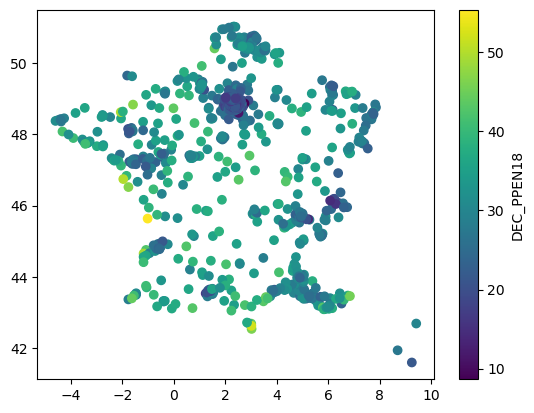

In [39]:
#On affiche la carte de la France avec, en jaune/vert, les communes ayant le plus de retraites et pensions dans le revenu des habitants
plt.scatter(df_complet['longitude'], df_complet['latitude'], c=df_complet['DEC_PPEN18'], cmap='viridis')
plt.colorbar(label='DEC_PPEN18')

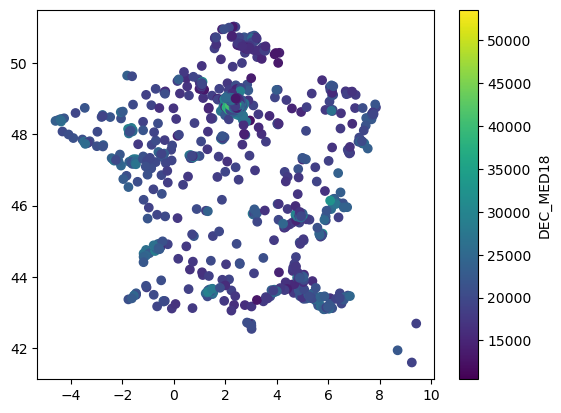

In [40]:
#On affiche la carte de la France avec, en jaune/vert, les communes ayant les plus forts revenus médians.
plt.scatter(df_complet['longitude'], df_complet['latitude'], c=df_complet['DEC_MED18'], cmap='viridis')
plt.colorbar(label='DEC_MED18')

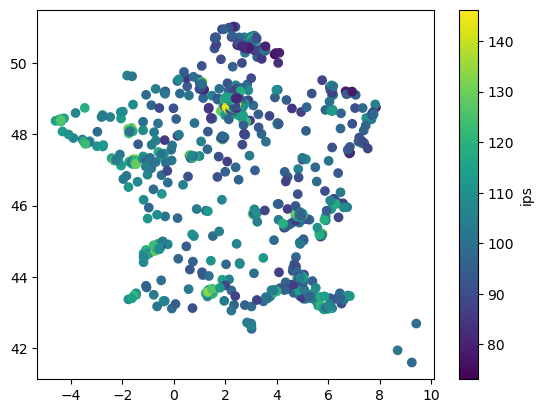

In [41]:
#On affiche la carte de la France avec, en jaune/vert, les communes ayant les plus forts indices IPS.
plt.scatter(df_complet['longitude'], df_complet['latitude'], c=df_complet['ips'], cmap='viridis')
plt.colorbar(label='ips')

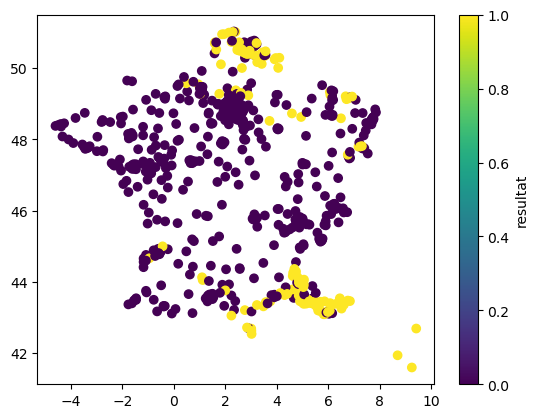

In [42]:
#On affiche la carte de la France avec, en jaune, les communes ayant votées majoritairement Lepen, en violet, Macron.
plt.scatter(df_complet['longitude'], df_complet['latitude'], c=df_complet['resultat'], cmap='viridis')
plt.colorbar(label='resultat')

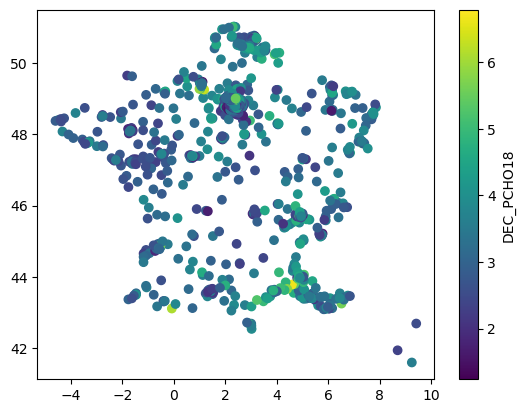

In [43]:
#On affiche la carte de la France avec, en vert/jaune, les communes ayant le plus fort pourcentage de chomage dans le revenu des habitants.
plt.scatter(df_complet['longitude'], df_complet['latitude'], c=df_complet['DEC_PCHO18'], cmap='viridis')
plt.colorbar(label='DEC_PCHO18')

## Partie 3 - Régression linéaire polynomiale

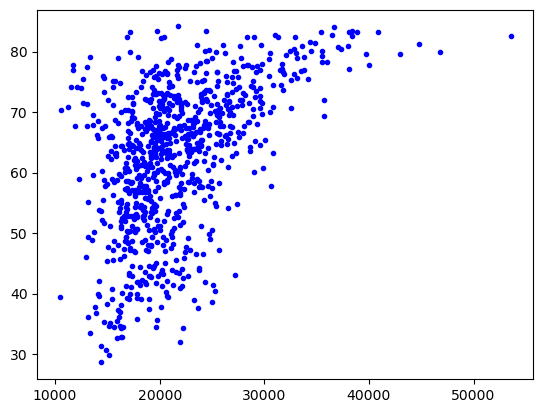

In [44]:
#On affiche sur un graphique le pourcentage des votes pour Emmanuel Macron en fonction du revenu médian pour chaque commune.
plt.plot(df_complet['DEC_MED18'],df_complet['% Voix/Exp Macron'],'.b')

In [45]:
import numpy as np
from sklearn.model_selection import train_test_split

df_complet = df_complet.sort_values(by='% Voix/Exp Macron', ascending=True)
X = np.array(df_complet['DEC_MED18'])
y = np.array(df_complet['% Voix/Exp Macron'])

#On sépare nos données avec des données d'entraînements et de tests (1/4 - 3/4).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(657,)
(219,)
(657,)
(219,)


In [46]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#On réalise une liste de degrée à essayer pour obtenir le meilleur
liste_degree = [2,3,4,5,6,7,8,10,15]

for degree in liste_degree:
    #On réalise la même chose que la case du dessus
    poly = PolynomialFeatures(degree=degree)
    poly_features_x_train = poly.fit_transform(X_train.reshape(-1, 1))
    poly_features_x_test = poly.fit_transform(X_test.reshape(-1, 1))
    
    poly_reg_model = LinearRegression()
    
    poly_reg_model.fit(poly_features_x_train, y_train)
    
    y_predicted = poly_reg_model.predict(poly_features_x_test)

    #On affiche la mean squared error ainsi que le score r2 afin de voir quel est le meilleur degré à utiliser
    mse = mean_squared_error(y_test, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    print("degree : ",degree," mse : ",mse," r2 : ",r2)

degree :  2  mse :  102.86313583940756  r2 :  0.25247975366769093
degree :  3  mse :  103.64783280697074  r2 :  0.24677725523905258
degree :  4  mse :  103.02937393299761  r2 :  0.2512716790775458
degree :  5  mse :  102.59513939537672  r2 :  0.25442731988004996
degree :  6  mse :  102.59083152261438  r2 :  0.25445862577095235
degree :  7  mse :  103.15393564722291  r2 :  0.2503664723429714
degree :  8  mse :  104.4155390813675  r2 :  0.24119823046341404
degree :  10  mse :  108.84394590946562  r2 :  0.20901640228963814
degree :  15  mse :  122.01974454418036  r2 :  0.11326610106973722


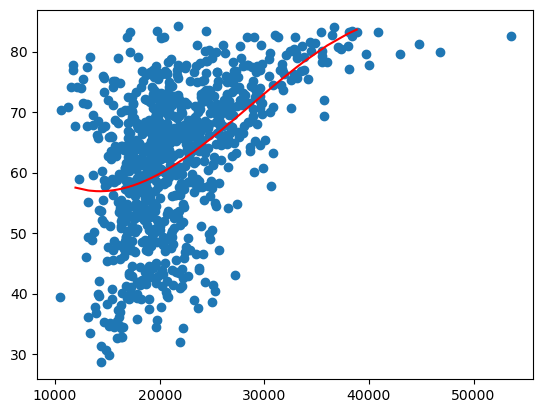

In [47]:
#On créé notre PolynmialFeatures de degrée 3
#Utiliser le degrée 3 est un bon compromis entre avoir le meilleur score r2 et éviter l'overfitting
poly = PolynomialFeatures(degree=3)

#On transforme nos dataframes X pour les rendres polynomiaux
poly_features_x_train = poly.fit_transform(X_train.reshape(-1, 1))
poly_features_x_test = poly.fit_transform(X_test.reshape(-1, 1))

#On créé notre modèle de régression linéaire
poly_reg_model = LinearRegression()

#On fit sur notre X_train polynomial et nos y_train
poly_reg_model.fit(poly_features_x_train, y_train)

#On prédit nos X_test
y_predicted = poly_reg_model.predict(poly_features_x_test)

#Code issue de chatgpt pour avoir un tri sur nos données X_test/y_test afin de ne pas avoir d'erreur de visualisation sur notre graphique
test_data = pd.DataFrame({'X_test': X_test, 'y_test': y_predicted})
sorted_test_data = test_data.sort_values(by='X_test', ascending=True)
X_test_sorted = sorted_test_data['X_test']
y_pred_sorted = sorted_test_data['y_test']

#On affiche notre graphique ainsi que notre courbe de régression
plt.scatter(X, y)
plt.plot(X_test_sorted, y_pred_sorted, c="red")
plt.show()


## Partie 4 - Ridge regression

In [48]:
from sklearn.kernel_ridge import KernelRidge
import numpy as np
liste_r2 = []
#On répète l'étape plusieurs fois pour obtenir un R2 moyen
for i in range(200):
    # On attribut à notre variable X nos différentes features : latitude, longitude, revenus médians par commune, part de retraite et de pension
    # dans les revenus, indices position sociales et la part de chomage dans les revenus des habitants des communes. 
    X = np.array(df_complet[['latitude','longitude','DEC_MED18','DEC_PPEN18','ips','DEC_PCHO18']])
    #On essaye de prédire le pourcentage de vote pour Emmanuel Macron
    y = np.array(df_complet['% Voix/Exp Macron'])

    #On sépare nos données pour l'entraînement et le test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    #On créé notre modèle de régression locale
    kernel_ridge = KernelRidge()
    kernel_ridge.fit(X_train, y_train)
    y_pred = kernel_ridge.predict(X_test)
    #On ajoute le score r2 obtenu dans un tableau
    liste_r2.append(r2_score(y_test, y_pred))
#On affiche la moyenne des r2 obtenus du tableau
print(np.mean(liste_r2))

0.500599750857006


In [49]:
from sklearn.inspection import permutation_importance
#On affiche les features les plus "importantes", qui explique le plus la valeur de r2
perm_importance = permutation_importance(kernel_ridge, X_test, y_test)
feature_importance_scores = perm_importance.importances_mean

print(feature_importance_scores)

[0.03508393 0.13611647 0.00384074 0.2440472  0.51972725 0.02117179]


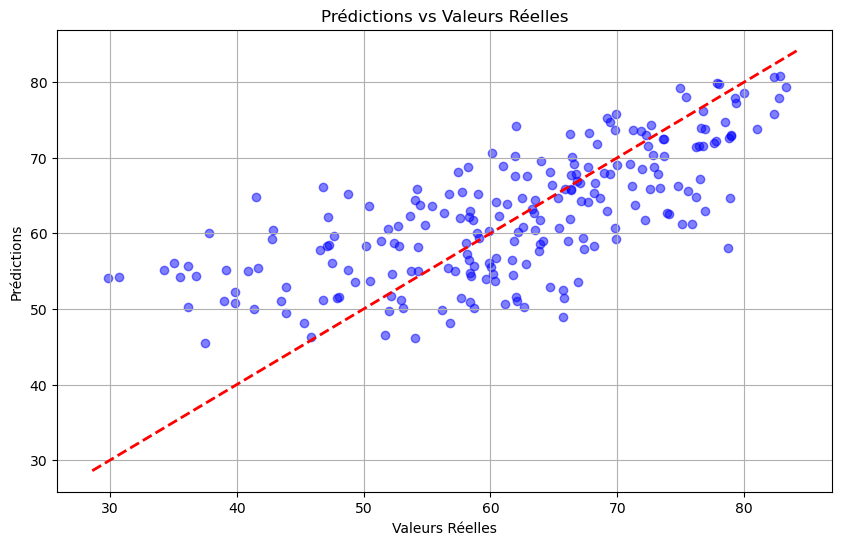

In [50]:
import matplotlib.pyplot as plt

#Code issue de ChatGPT
#On réalise une visualisation pour constater la performance de notre modèle : plus les points sont proches sont proches de la droite rouge
#, plus les valeurs prédites se rapprochent des valeurs réelles.

# Définir les données
X = np.array(df_complet[['latitude', 'longitude', 'DEC_MED18','DEC_PPEN18','DEC_PCHO18','ips']])
y = np.array(df_complet['% Voix/Exp Macron'])

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red', linewidth=2)  # ligne de référence 1:1
plt.title('Prédictions vs Valeurs Réelles')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.grid(True)
plt.show()

On peut voir ici que notre meilleur modèle de prédiction est notre modèle de régression locale. On obtient en moyenne un score r2 de 0.5 contre un score r2 de 0.24 pour la régression linéaire avec feature polynomiale.

## Partie 5 - SVM Classification

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X = np.array(df_complet[['latitude','longitude','DEC_MED18','DEC_PPEN18','ips','DEC_PCHO18']])
y = np.array(df_complet['resultat'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [52]:
from sklearn.model_selection import GridSearchCV

#On utilise une méthode de validation croisée pour obtenir les meilleurs paramètres de notre modèle SVM
param_grid = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}
cv = 5
#On cherche à optimiser l'accuracy
scoring = 'accuracy'
svm = SVC()
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=cv, scoring=scoring)
grid_search.fit(X_train, y_train)

# On affiche les meilleurs hyperparamètres
print("Meilleurs hyperparamètres:", grid_search.best_params_)

# On affiche la meilleure métrique de performance
print("Meilleure performance:", grid_search.best_score_)

Meilleurs hyperparamètres: {'C': 0.1, 'kernel': 'linear'}
Meilleure performance: 0.8418099426895906


In [53]:
#On utilise les meilleurs paramètres obtenus dans la case précèdente
svm_classifier = SVC(kernel='rbf', C=0.1)
svm_classifier.fit(X_train, y_train)

#On prédit nos données avec SVM
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

#On affiche l'accuracy
print("Accuracy:", accuracy)

#On affiche la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(conf_matrix)

Accuracy: 0.8288973384030418
Matrice de confusion :
[[218   0]
 [ 45   0]]


On peut voir ici qu'on obtient une assez bonne accuracy (environ 0.8 - 0.85) mais nous avons un problème : notre modèle se trompe pour prédire la classe des votants de Marine Lepen : cela peut venir de plusieurs raisons.
Premièrement, nos classes sont pas équitables : nous avons beaucoup plus de communes ayant votées majoritairement Macron que Lepen, et deuxièmement, nous avons perdu beaucoup de données lors du nettoyage de nos données. Il faudrait plus de données d'entraînement pour que notre modèle reconnaisse mieux les caractéristiques des communes votant en majoriter Marine Lepen. Pour remédier à cela, nous allons essayer d'accorder une pondération des classes en accordant un facteur plus élevés pour les classes 1 car elles sont beaucoup moins présente.

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# On définit les poids de classe
class_weights = {0: 1, 1: 4}

# On créé le classificateur SVM avec pondération de classe
svm_classifier_pondere = SVC(kernel='rbf', C=0.1, class_weight=class_weights)

# On entraîne notre modèle SVM
svm_classifier_pondere.fit(X_train, y_train)

# On fait notre prédictions sur l'ensemble de test
y_pred = svm_classifier_pondere.predict(X_test)

# On calcul l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)

# On affiche la matrice de confusion
print("Matrice de confusion :")
print(conf_matrix)

Accuracy: 0.6197718631178707
Matrice de confusion :
[[131  87]
 [ 13  32]]


Avec un facteur de classe 4 pour notre classe 1, nous baissons beaucoup notre accuracy (environ 0.6), mais notre modèle détecte mieux les communes qui votent à majorité Marine Lepen.